# **Product_Subscription : Exploratory Data Analysis**

In [180]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = 20,10
from pandas_profiling import ProfileReport
import missingno as msno
import plotly.express as px
%matplotlib inline
import numpy as np

## 1) 1er jeu de données: Indicateurs socio-économiques

In [36]:
df_socio = pd.read_csv('../data/raw/socio_eco.csv', sep=';')
df_socio['DATE'] = pd.to_datetime(df_socio['DATE'])

df_socio.head()

DATE  EMPLOYMENT_VARIATION_RATE  IDX_CONSUMER_PRICE  \
0 2008-05-31                        1.1              93.994   
1 2008-06-30                        1.4              94.465   
2 2008-07-31                        1.4              93.918   
3 2008-08-31                        1.4              93.444   
4 2008-09-30                        NaN                 NaN   

   IDX_CONSUMER_CONFIDENCE  
0                    -36.4  
1                    -41.8  
2                    -42.7  
3                    -36.1  
4                      NaN

Ce jeu de données comprend des indicateurs macro-économiques classiques, relatifs au niveau du chômage, de l'inflation et de la propension à consommer. 

Les données sont rendues pour chaque fin de mois et correspondent donc au chiffre estimé pour le mois écoulé.

Ils couvrent la période s'étendant de mi-2008 à fin 2010, ce qui correspond à une période singulière de l'histoire économique et financière récente, avec la crise bancaire et financière liée aux subprimes américains et la récession économique qui a suivit.

Nous remarquons la présence de NaN dans les trois colonnes:

- Pour la colonne **EMPLOYMENT_VARIATION_RATE**, on pourra les corriger facilement puisqu'il s'agit d'indicateurs trimestriels; les valeurs manquantes sont donc connues.

- Pour la colonne **IDX_CONSUMER_PRICE**, les valeurs manquantes pourront être approchées par l'utilisation de la médiane ou de la moyenne.

- Pour la colonne **IDX_CONSUMER_CONFIDENCE**, on procèdera de manière analogue.

In [9]:
#indices = ProfileReport(df1 , title="Indices Eco", explorative=True)
#indices.to_notebook_iframe()

In [10]:
(df_socio.isna().sum() / df_socio.shape[0] * 100).sort_values(ascending=False)

IDX_CONSUMER_CONFIDENCE      16.666667
IDX_CONSUMER_PRICE           16.666667
EMPLOYMENT_VARIATION_RATE    16.666667
DATE                          0.000000
dtype: float64

In [11]:
df_socio.info()
df_socio.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   DATE                       30 non-null     object 
 1   EMPLOYMENT_VARIATION_RATE  25 non-null     float64
 2   IDX_CONSUMER_PRICE         25 non-null     float64
 3   IDX_CONSUMER_CONFIDENCE    25 non-null     float64
dtypes: float64(3), object(1)
memory usage: 1.1+ KB


(30, 4)

In [12]:
df_socio.describe()

EMPLOYMENT_VARIATION_RATE  IDX_CONSUMER_PRICE  IDX_CONSUMER_CONFIDENCE
count                  25.000000            25.00000                25.000000
mean                   -1.404000            93.37128               -38.760000
std                     1.545283             0.72030                 6.198185
min                    -3.400000            92.20100               -50.000000
25%                    -2.900000            92.75600               -42.000000
50%                    -1.800000            93.36900               -39.800000
75%                    -0.200000            93.99400               -34.600000
max                     1.400000            94.60100               -26.900000

array([[<AxesSubplot:title={'center':'EMPLOYMENT_VARIATION_RATE'}>,
        <AxesSubplot:title={'center':'IDX_CONSUMER_PRICE'}>],
       [<AxesSubplot:title={'center':'IDX_CONSUMER_CONFIDENCE'}>,
        <AxesSubplot:>]], dtype=object)

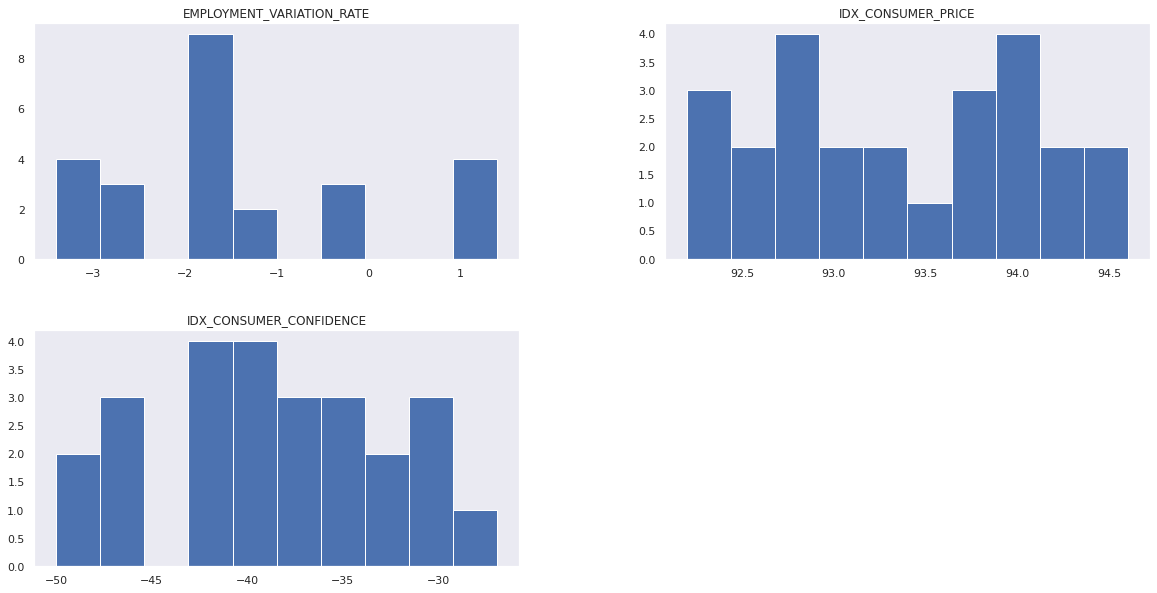

In [45]:
df_socio.hist(grid=False)

<AxesSubplot:>

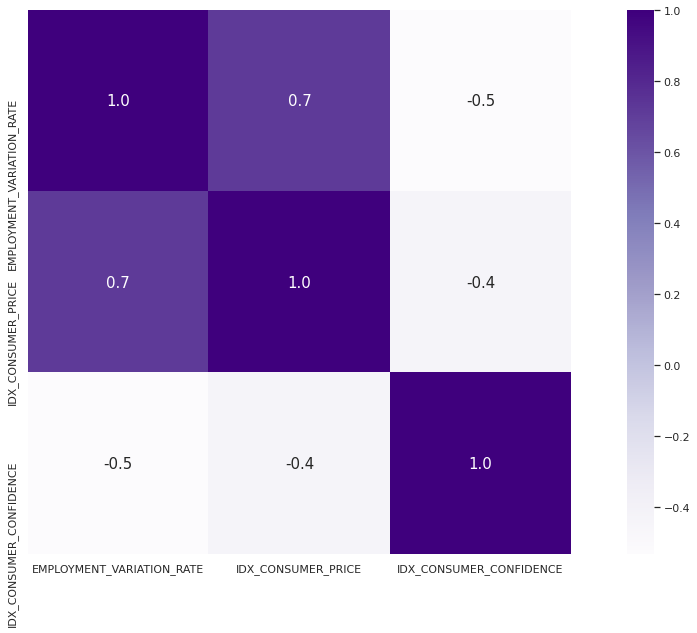

In [46]:
corr_socio = df_socio.corr(method='spearman')
sns.heatmap(corr_socio, cbar=True, square= True,fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Purples')

Importe corrélation positive entre la variation du taux de chômage et l'indice des prix à la consommation.
Très forte corrélation monotone de Spearman notamment.

Text(0.5, 1.04, 'Pairplot of Economical Data')

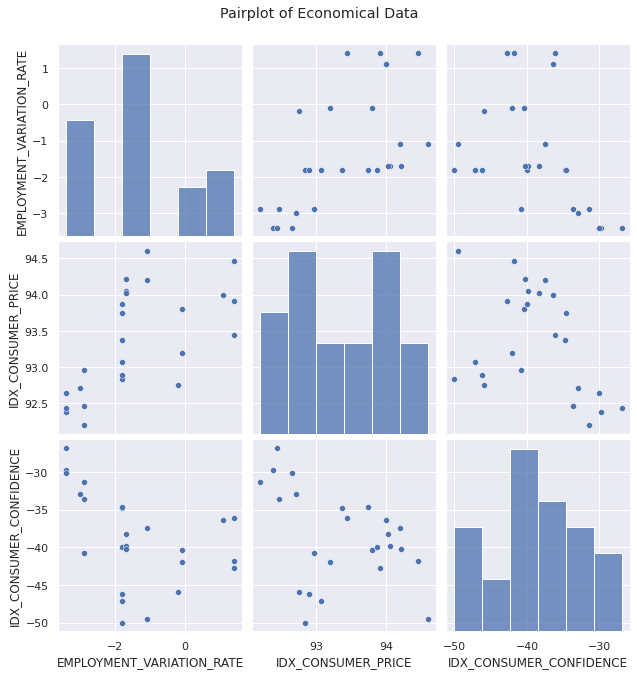

In [47]:
sns.set_theme(context='notebook', palette='deep')
g =sns.pairplot(df_socio, height=3)
g.fig.suptitle("Pairplot of Economical Data" , y=1.04)

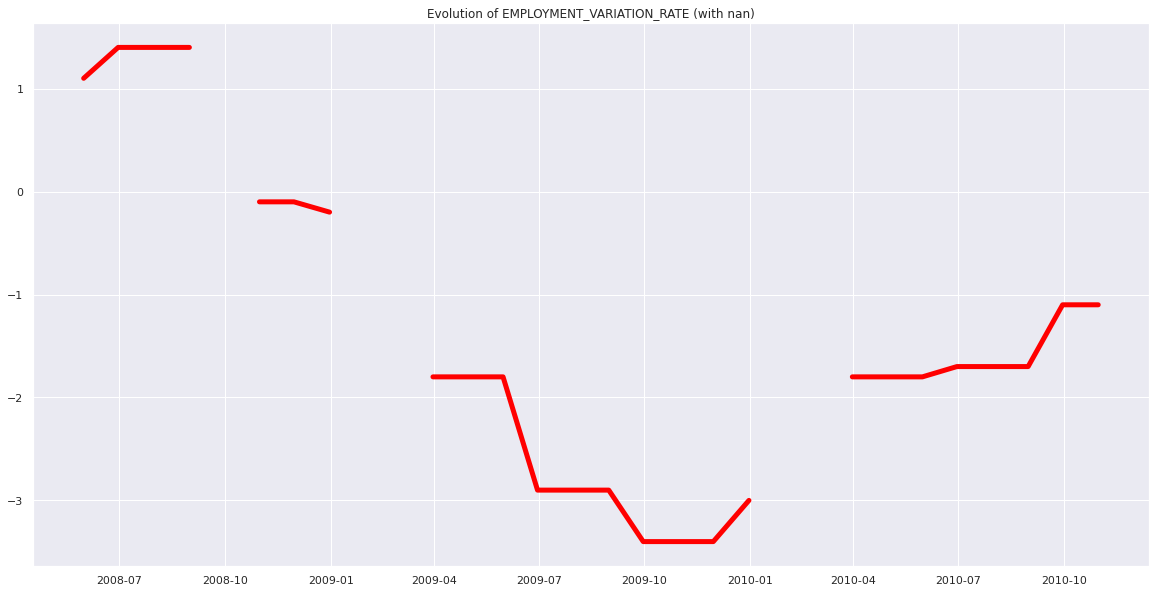

In [55]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(df_socio['DATE'],df_socio['EMPLOYMENT_VARIATION_RATE'], color='red', linewidth=5)
ax.set_title('Evolution of EMPLOYMENT_VARIATION_RATE (with nan)')

plt.show()

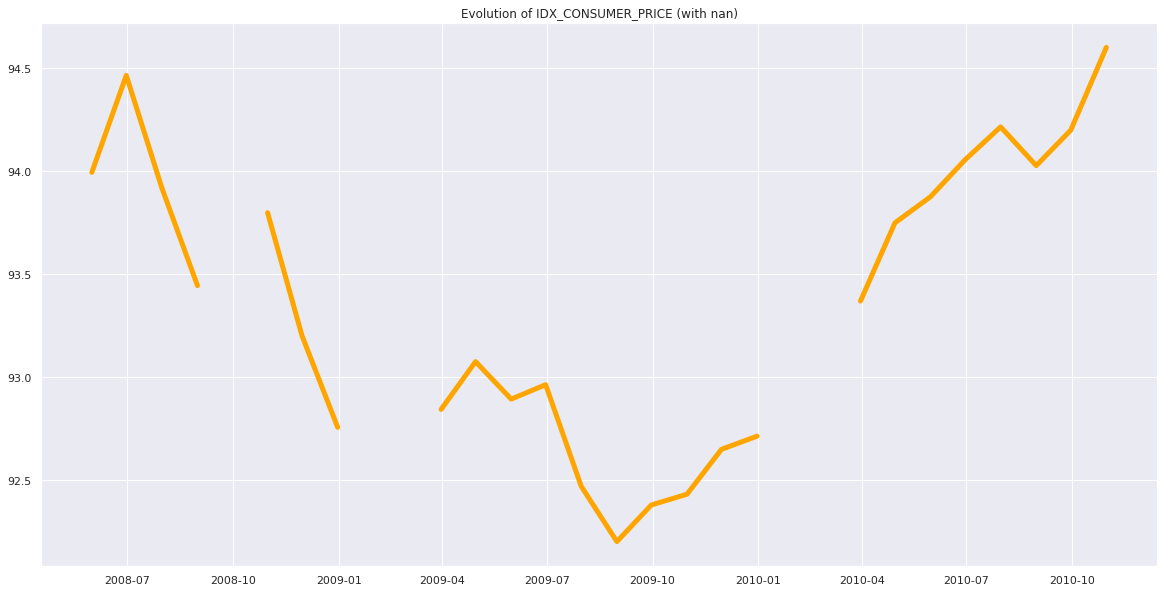

In [54]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(df_socio['DATE'],df_socio['IDX_CONSUMER_PRICE'], color='orange', linewidth=5)
ax.set_title('Evolution of IDX_CONSUMER_PRICE (with nan)')
plt.show()

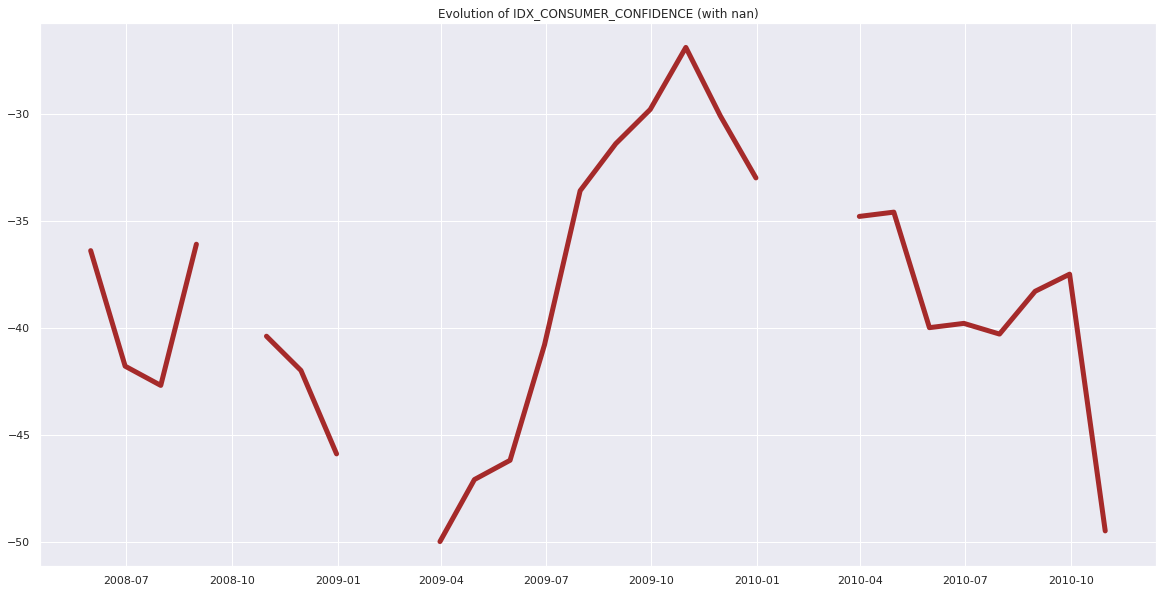

In [56]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(df_socio['DATE'],df_socio['IDX_CONSUMER_CONFIDENCE'], color='brown', linewidth=5)
ax.set_title('Evolution of IDX_CONSUMER_CONFIDENCE (with nan)')
plt.show()

## 2) 2nd jeu de données: Campagne marketing d'une grande institution bancaire

In [108]:
df_marketing = pd.read_csv('../data/raw/data.csv', sep=";")
df_marketing['DATE'] = pd.to_datetime(df_marketing['DATE'])
df_marketing['MONTH'] = df_marketing['DATE'].dt.month_name()
df_marketing['WEEKDAY'] = df_marketing['DATE'].dt.day_name()
categorcial_variables = ['JOB_TYPE', 'STATUS', 'EDUCATION', 'HAS_DEFAULT', 'HAS_PERSO_LOAN', 'CONTACT', 'MONTH', 'WEEKDAY']
for cat in categorcial_variables:
    df_marketing[cat] = df_marketing[cat].astype('category')
df_marketing.head()

DATE  AGE       JOB_TYPE       STATUS   EDUCATION HAS_DEFAULT  \
0 2008-05-05   58        Manager        Marié   Tertiaire          No   
1 2008-05-05  123     Technicien          NaN  Secondaire          No   
2 2008-05-05   33  Entrepreuneur        Marié  Secondaire          No   
3 2008-05-05   47       Col bleu        Marié         NaN          No   
4 2008-05-05   33            NaN  Célibataire         NaN          No   

   BALANCE HAS_HOUSING_LOAN HAS_PERSO_LOAN CONTACT  DURATION_CONTACT  \
0     2143              Yes             No     NaN               261   
1       29              Yes            NaN     NaN               151   
2        2              Yes            Yes     NaN                76   
3     1506              Yes             No     NaN                92   
4        1               No             No     NaN               198   

   NB_CONTACT  NB_DAY_LAST_CONTACT  NB_CONTACT_LAST_CAMPAIGN  \
0           1                   -1                         0   
1           1                   -1                         0   
2           1                   -1                         0   
3           1                   -1                         0   
4           1                   -1                         0   

  RESULT_LAST_CAMPAIGN SUBSCRIPTION MONTH WEEKDAY  
0                  NaN           No   May  Monday  
1                  NaN           No   May  Monday  
2                  NaN           No   May  Monday  
3                  NaN           No   May  Monday  
4                  NaN           No   May  Monday

Nous avons **14 variables explicatives** dans ce jeu de données : 

- Informations **personnelles** sur les clients:
    - *AGE*: Age du client (en années)
    - *STATUS*: Situation matrimoniale du client (Marié, Célibataire, Divorcé)
    - *EDUCATION*: Niveau de diplôme (Primaire, Secondaire ou Tertiaire)
    - *JOB_TYPE*: Catégorie de métier du client (Manager, Technicien, Entrepreneur, Col Bleu, Retraité, Administratif, Services, Indépendant, Chômeur, Employé de ménage , Etudiant)


- Informations sur la **situation financière** des clients:
    - *HAS_DEFAULT*: Le client a-t-il déja fait défaut (Yes/No)
    - *BALANCE*: Le montant du compte courant du client
    - *HAS_HOUSING_LOAN* : Détention d'un crédit immobilier(Yes/No)
    - *HAS_PERSO_LOAN* : Détention d'un crédit à la consommation (Yes/No)
    
    
- Informations sur la **campagne marketing**:
    - *CONTACT* : Type de communication du contact (Portable, Fixe)
    - *DURATION_CONTACT* : Durée du dernier contact (en secondes)
    - *NB_CONTACT* : Nombre de contacts effectués pendant cette campagne et pour ce client (inclut le dernier contact)
    - *NB_DAY_LAST_CONTACT* : Nombre de jours écoulés après que le client a été contacté pour la dernière fois lors d'une campagne précédente (-1 signifie que le client n'a pas été contacté auparavant)
    - *NB_CONTACT_LAST_CAMPAIGN* : Nombre de contacts effectués avant cette campagne et pour ce client
    - *RESULT_LAST_CAMPAIGN* : Résultat de la précédente campagne marketing (Succès, Echec, Autre)
    
Nous avons **1 variable cible**:

- *SUBSCRIPTION* : Le client a-t-il souscrit ou non ? (Yes/No)

In [58]:
df_marketing.info()
df_marketing.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45136 entries, 0 to 45135
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   DATE                      45136 non-null  object
 1   AGE                       45136 non-null  int64 
 2   JOB_TYPE                  44850 non-null  object
 3   STATUS                    44008 non-null  object
 4   EDUCATION                 43283 non-null  object
 5   HAS_DEFAULT               45136 non-null  object
 6   BALANCE                   45136 non-null  int64 
 7   HAS_HOUSING_LOAN          45136 non-null  object
 8   HAS_PERSO_LOAN            43782 non-null  object
 9   CONTACT                   32117 non-null  object
 10  DURATION_CONTACT          45136 non-null  int64 
 11  NB_CONTACT                45136 non-null  int64 
 12  NB_DAY_LAST_CONTACT       45136 non-null  int64 
 13  NB_CONTACT_LAST_CAMPAIGN  45136 non-null  int64 
 14  RESULT_LAST_CAMPAIGN  

(45136, 16)

<AxesSubplot:>

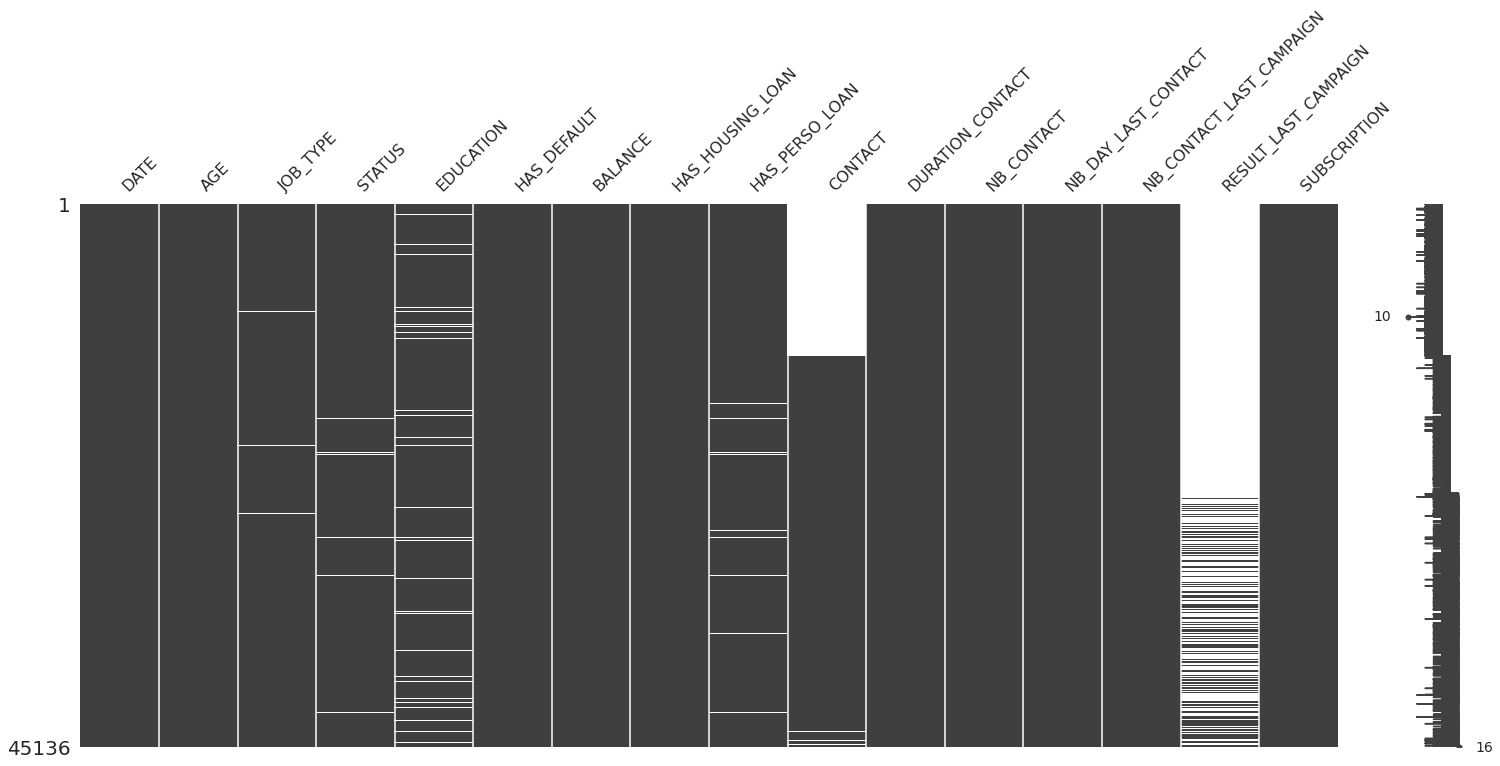

In [71]:
msno.matrix(df_marketing)

<AxesSubplot:>

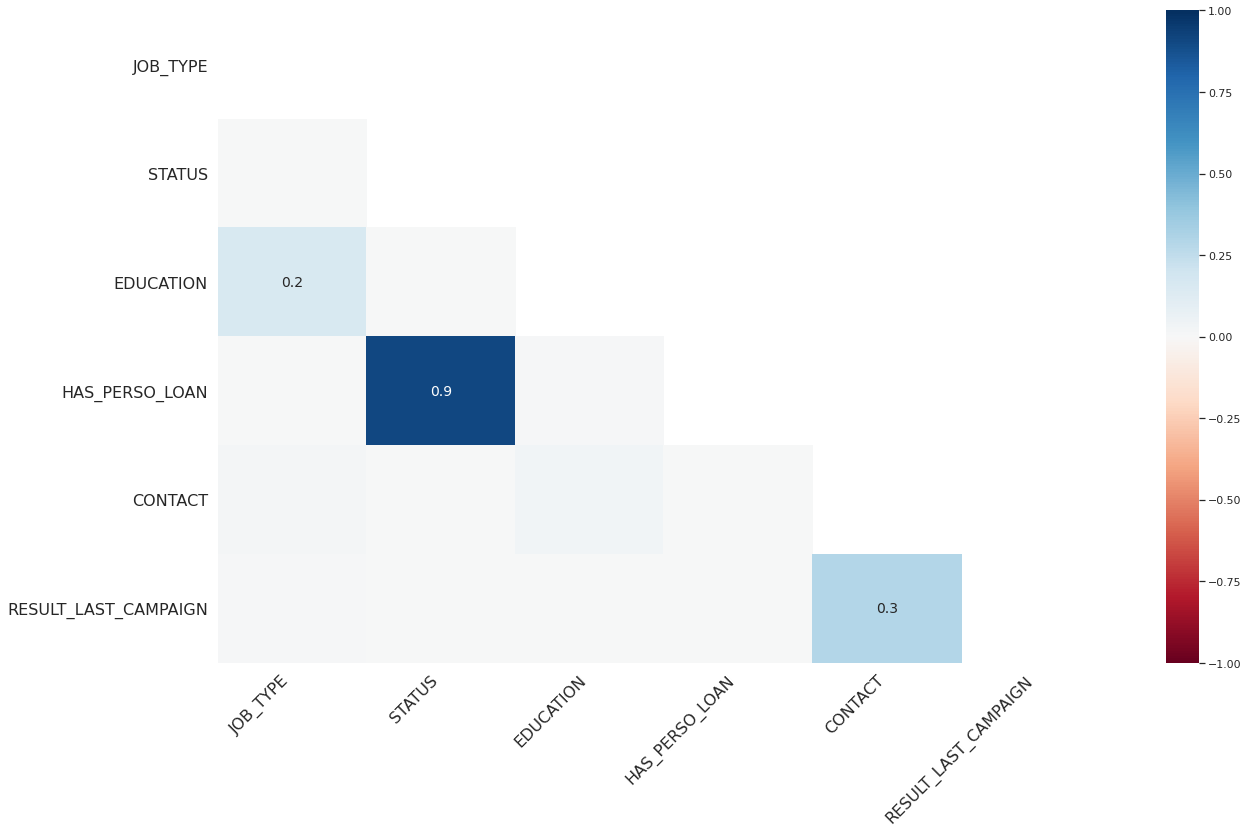

In [65]:
msno.heatmap(df_marketing)

In [124]:
(df2.isna().sum() / df2.shape[0] * 100).sort_values(ascending=False)

RESULT_LAST_CAMPAIGN        81.839330
CONTACT                     28.843938
EDUCATION                    4.105370
HAS_PERSO_LOAN               2.999823
STATUS                       2.499114
JOB_TYPE                     0.633641
SUBSCRIPTION                 0.000000
NB_CONTACT_LAST_CAMPAIGN     0.000000
NB_DAY_LAST_CONTACT          0.000000
NB_CONTACT                   0.000000
DURATION_CONTACT             0.000000
HAS_HOUSING_LOAN             0.000000
BALANCE                      0.000000
HAS_DEFAULT                  0.000000
AGE                          0.000000
DATE                         0.000000
dtype: float64

Importante présence de NaN dans deux colonnes, plus réduite dans quatre colonnes.
Six variables explicatives à traiter pour valeurs manquantes.

In [66]:
df_marketing.describe()

AGE        BALANCE  DURATION_CONTACT   NB_CONTACT  \
count  45136.000000   45136.000000      45136.000000  45136.00000   
mean      44.206354    1362.182847        258.050625      2.76573   
std       19.149653    3046.691765        257.527875      3.10002   
min       18.000000   -8019.000000          0.000000      1.00000   
25%       33.000000      72.000000        103.000000      1.00000   
50%       40.000000     447.500000        180.000000      2.00000   
75%       50.000000    1425.000000        318.000000      3.00000   
max      123.000000  102127.000000       4918.000000     63.00000   

       NB_DAY_LAST_CONTACT  NB_CONTACT_LAST_CAMPAIGN  
count         45136.000000              45136.000000  
mean             40.042272                  0.575173  
std              99.910200                  2.296948  
min              -1.000000                  0.000000  
25%              -1.000000                  0.000000  
50%              -1.000000                  0.000000  
75%              -1.000000                  0.000000  
max             854.000000                275.000000

In [76]:
v = pd.qcut(df_marketing['AGE'], 4, labels=list('ABCD'))
v

0        D
1        D
2        A
3        C
4        A
        ..
45131    C
45132    D
45133    A
45134    D
45135    D
Name: AGE, Length: 45136, dtype: category
Categories (4, object): ['A' < 'B' < 'C' < 'D']

In [82]:
df_marketing.loc[(df_marketing['AGE'] <= 33), 'AGE_CAT']  = '<33'
df_marketing.loc[(df_marketing['AGE'] > 33) & (df_marketing['AGE'] <= 40), 'AGE_CAT'] = '33-40'
df_marketing.loc[(df_marketing['AGE'] > 40) & (df_marketing['AGE'] <= 50), 'AGE_CAT'] = '40-50'
df_marketing.loc[(df_marketing['AGE'] > 50), 'AGE_CAT'] = '>50'

In [83]:
rcParams['figure.figsize'] = 20,10

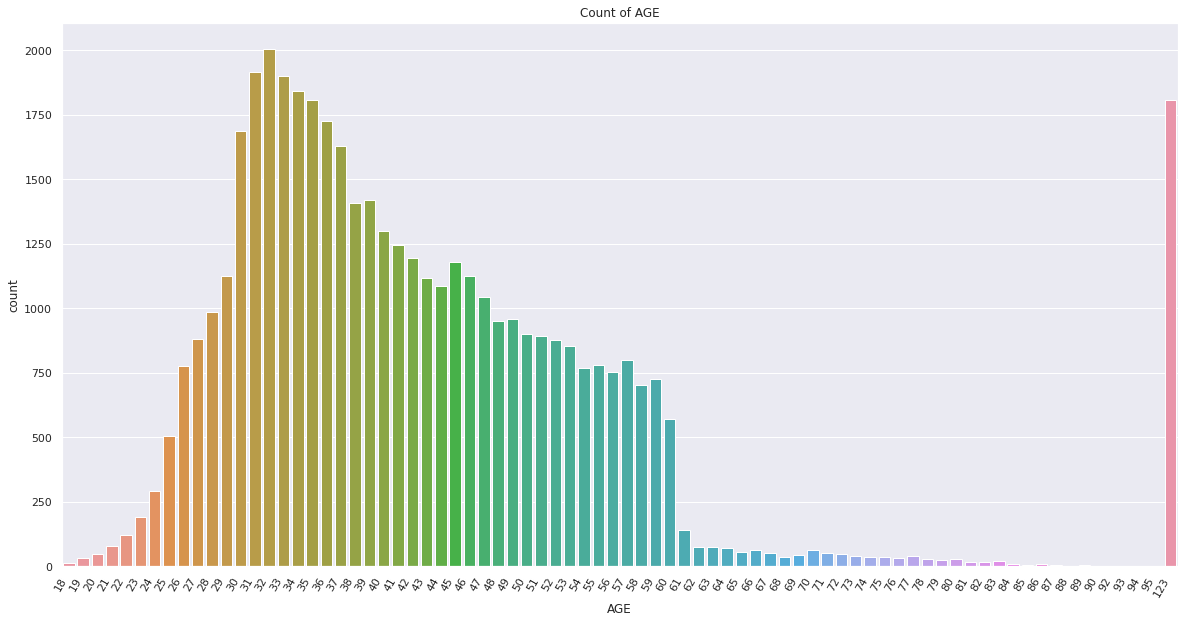

In [84]:
ax = sns.countplot(x=df_marketing['AGE'])
ax.set_title('Count of AGE')

ax.set_xticklabels(ax.get_xticklabels(), rotation=60, ha="right")
plt.show()

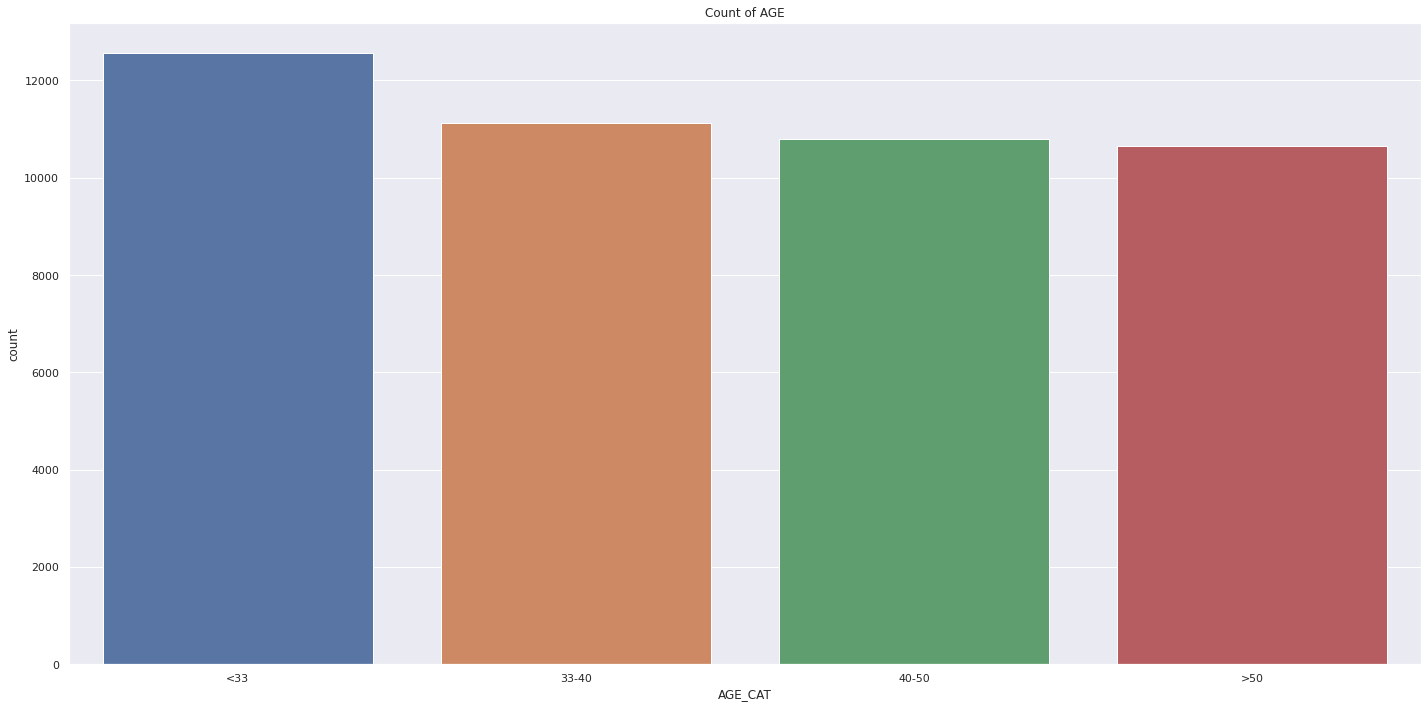

In [86]:
ax = sns.countplot(x=df_marketing['AGE_CAT'], order = df_marketing['AGE_CAT'].value_counts().index)
ax.set_title('Count of AGE')
plt.tight_layout()

Présence fortement marquée d'une valeur aberrante, en proportion significative, à l'âge 123 ans, valeur elle-même objectivement improbable statistiquement. 

<AxesSubplot:xlabel='JOB_TYPE', ylabel='count'>

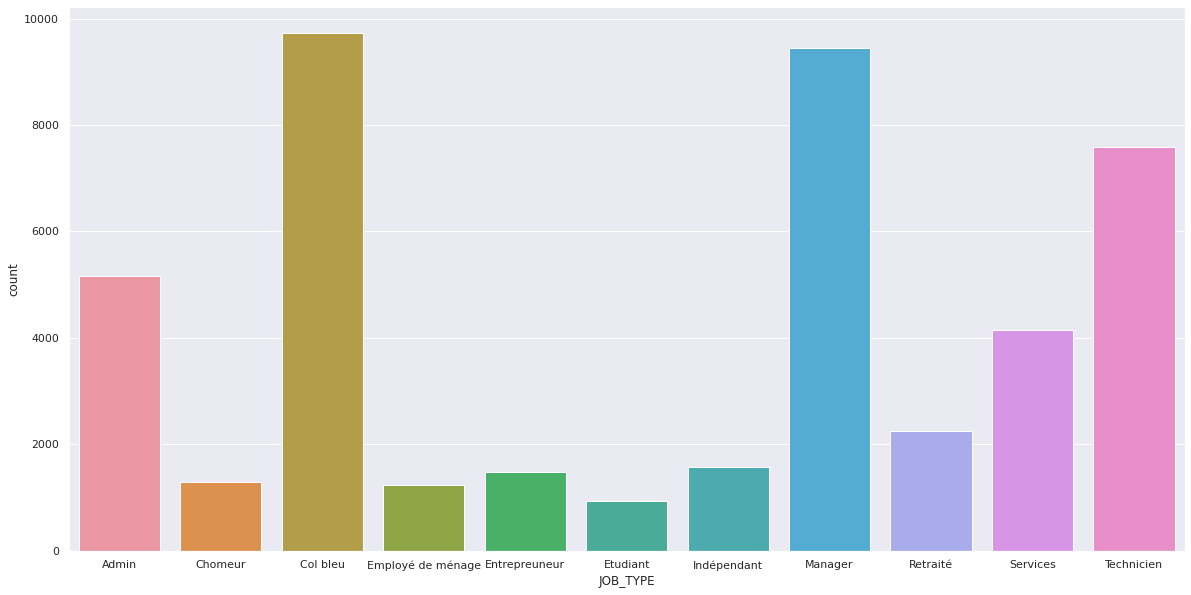

In [128]:
sns.countplot(x=df_marketing['JOB_TYPE'])

<AxesSubplot:xlabel='STATUS', ylabel='count'>

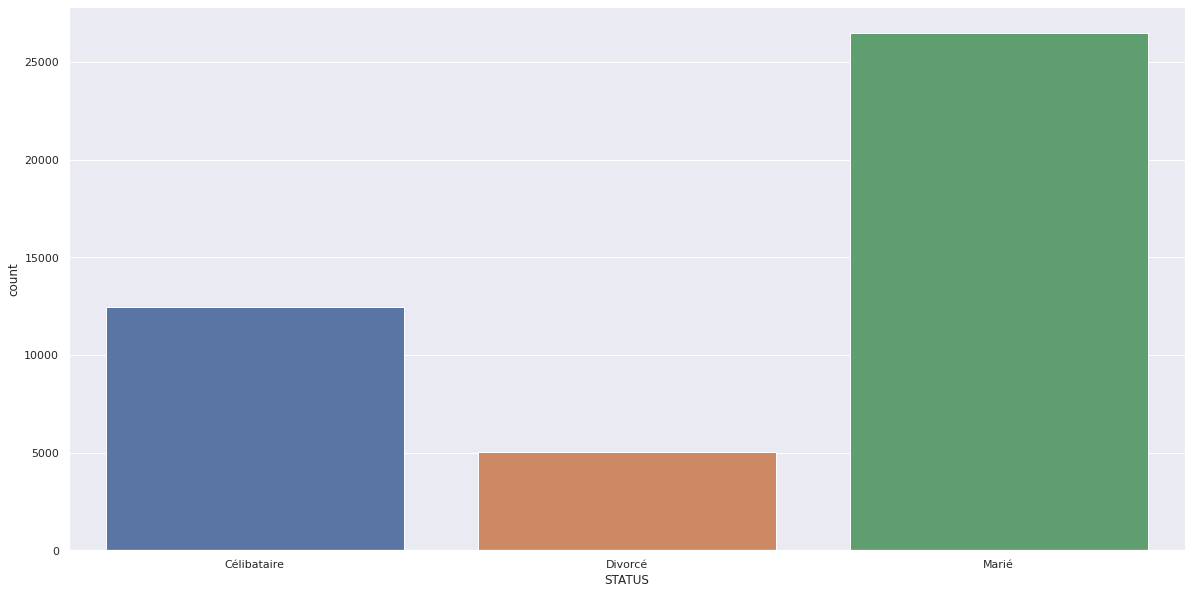

In [127]:
sns.countplot(x=df_marketing['STATUS'])

<AxesSubplot:xlabel='EDUCATION', ylabel='count'>

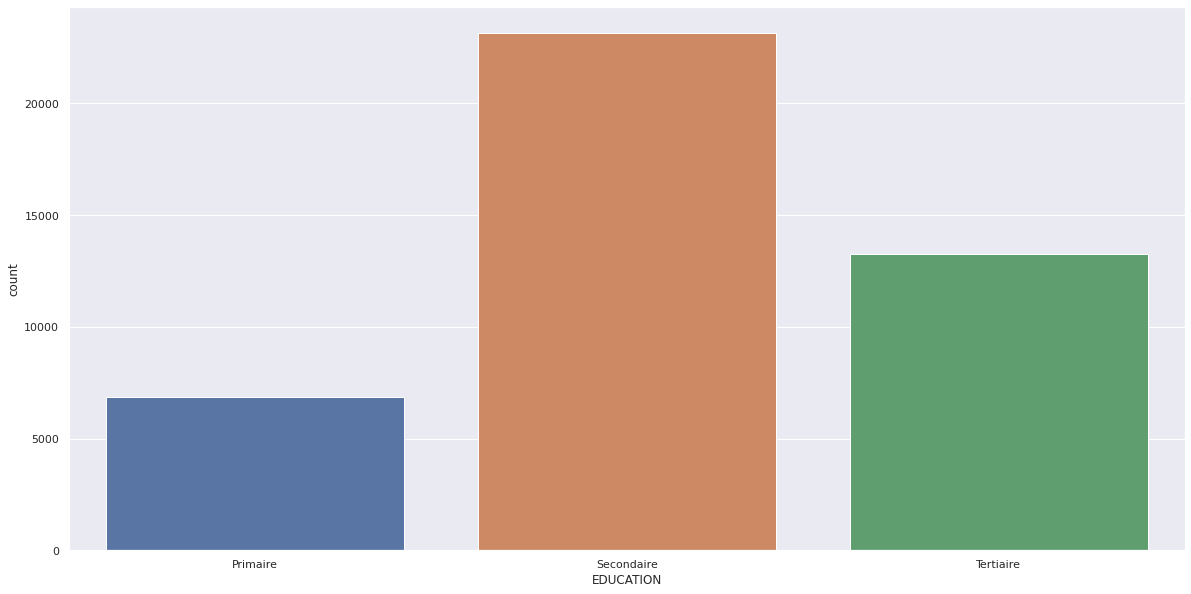

In [130]:
sns.countplot(x=df_marketing['EDUCATION'])

<AxesSubplot:xlabel='HAS_DEFAULT', ylabel='count'>

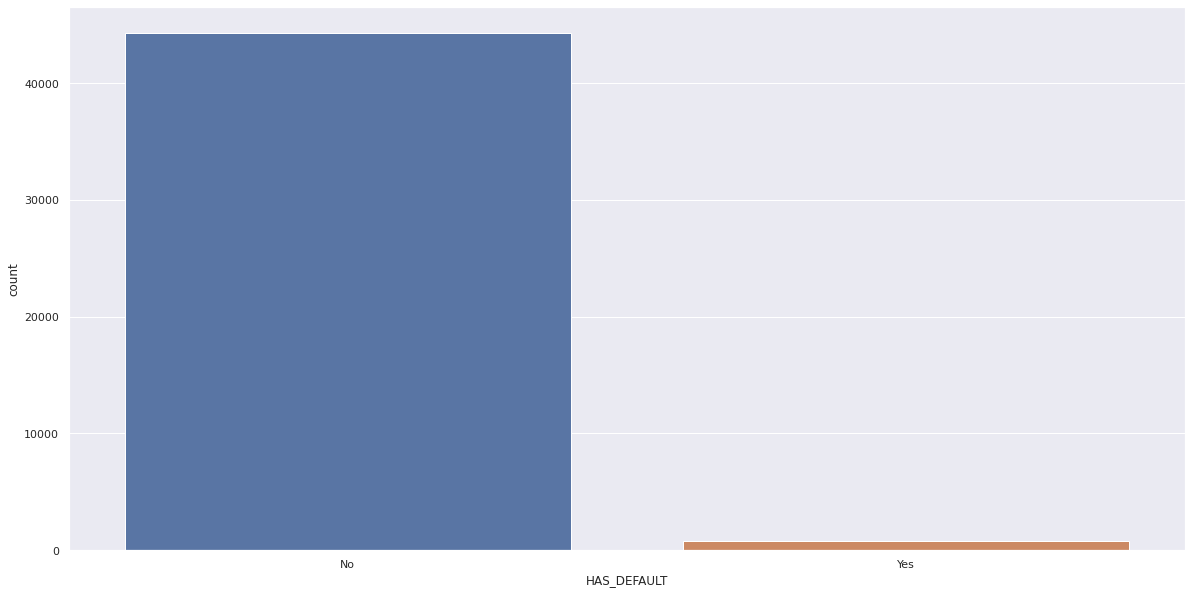

In [131]:
sns.countplot(x=df_marketing['HAS_DEFAULT'])

<AxesSubplot:xlabel='BALANCE', ylabel='Count'>

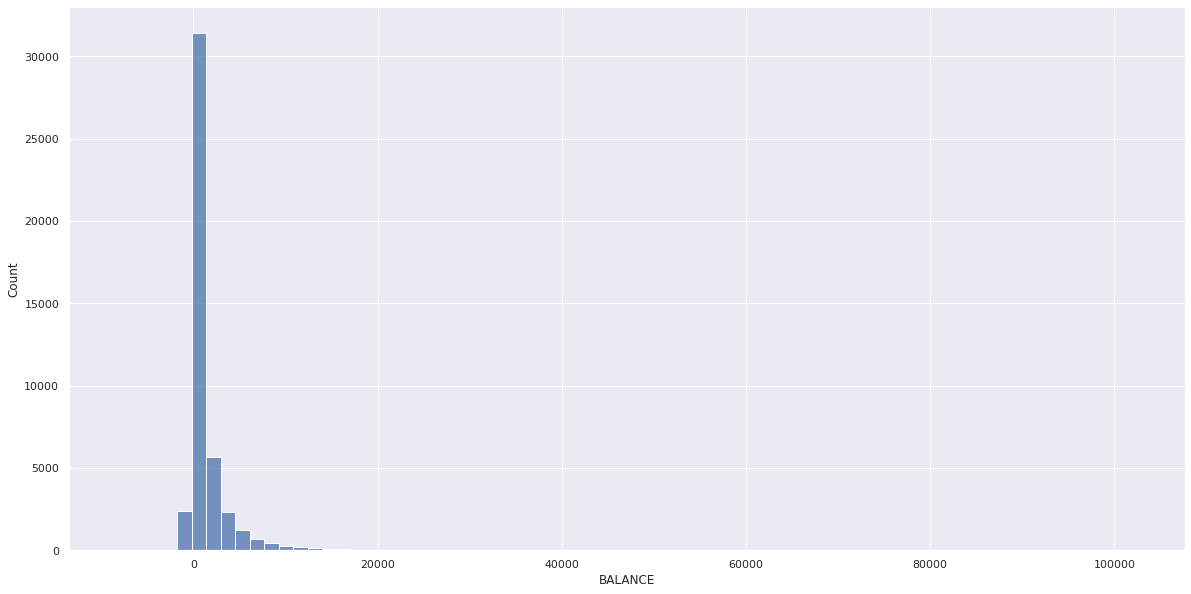

In [132]:
sns.histplot(x=df_marketing['BALANCE'], bins=70)

Les valeurs élévées de BALANCE nous empêchent de visualiser correctement la distribution, essayons de les retirer. 

In [134]:
df_without_hight_balance = df_marketing[df_marketing['BALANCE']<20000]

<AxesSubplot:xlabel='BALANCE', ylabel='Count'>

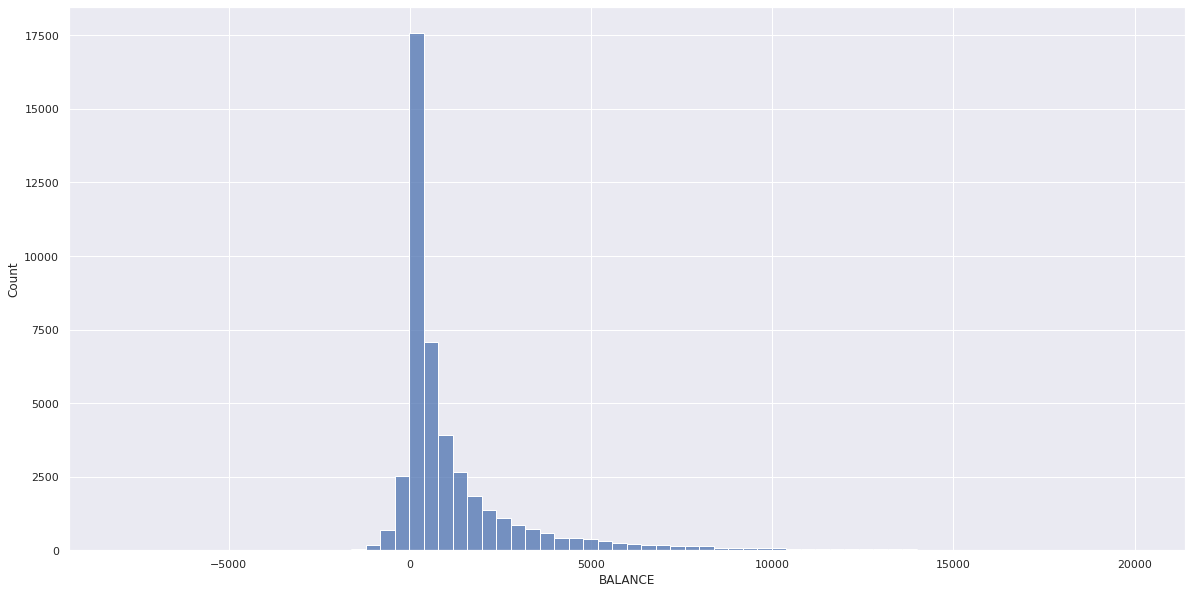

In [135]:
sns.histplot(x=df_without_hight_balance['BALANCE'], bins=70)

<AxesSubplot:xlabel='DURATION_CONTACT', ylabel='Count'>

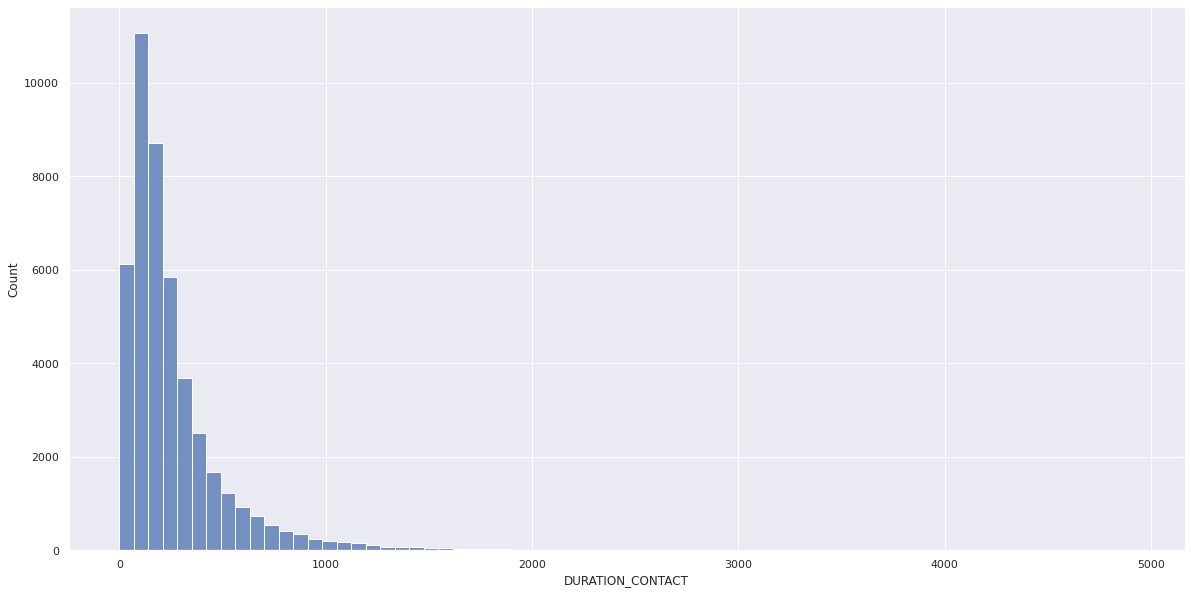

In [137]:
sns.histplot(x=df_marketing['DURATION_CONTACT'], bins=70)

<AxesSubplot:xlabel='NB_CONTACT', ylabel='count'>

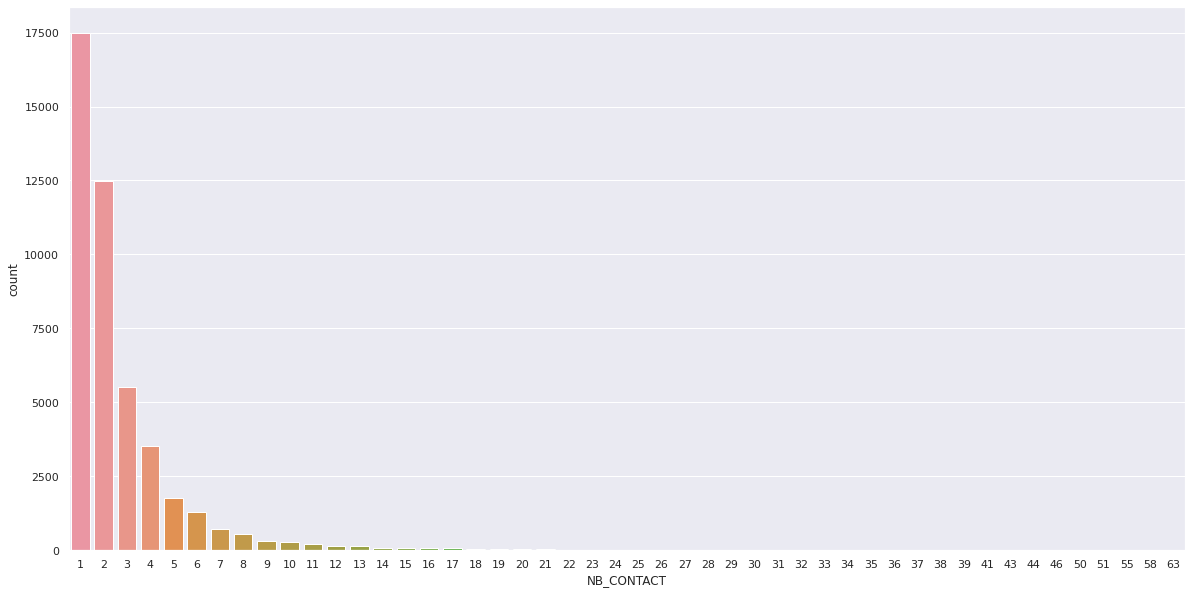

In [138]:
sns.countplot(x=df_marketing['NB_CONTACT'])

<AxesSubplot:xlabel='NB_DAY_LAST_CONTACT', ylabel='Count'>

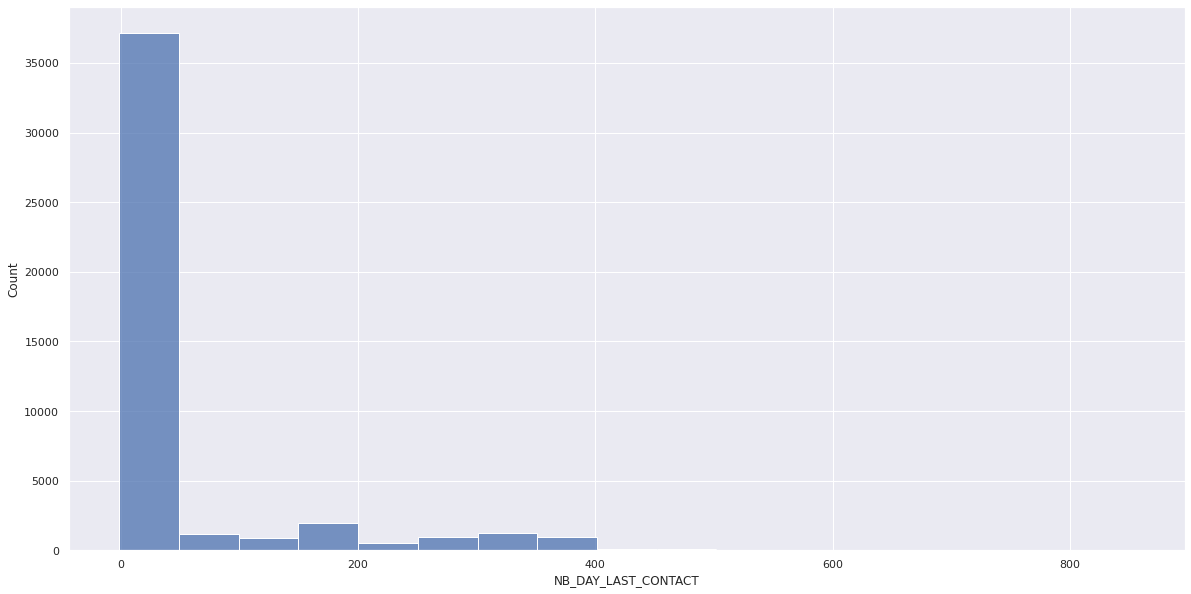

In [139]:
sns.histplot(x=df_marketing['NB_DAY_LAST_CONTACT'])

<AxesSubplot:xlabel='NB_CONTACT_LAST_CAMPAIGN', ylabel='count'>

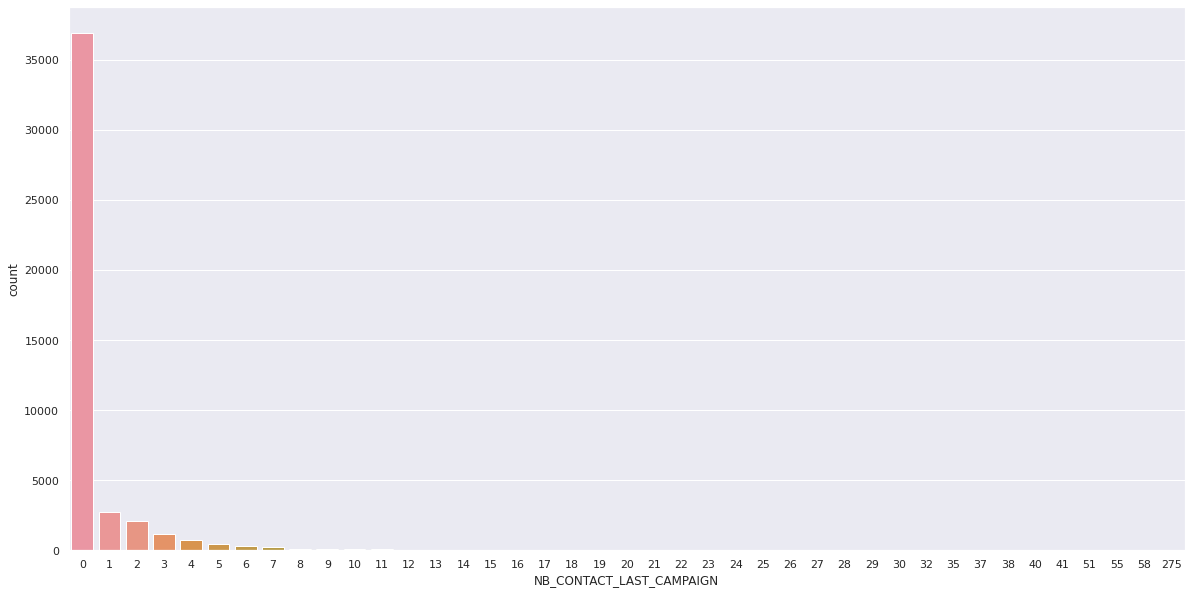

In [140]:
sns.countplot(x=df_marketing['NB_CONTACT_LAST_CAMPAIGN'])

<AxesSubplot:xlabel='RESULT_LAST_CAMPAIGN', ylabel='count'>

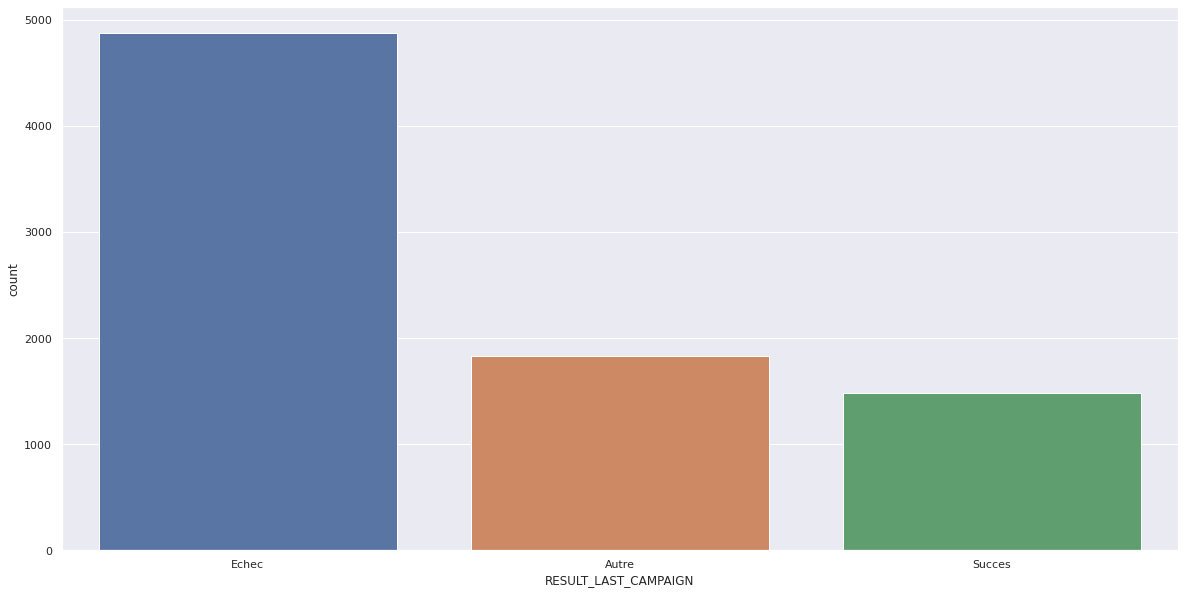

In [141]:
sns.countplot(x=df_marketing['RESULT_LAST_CAMPAIGN'])

<AxesSubplot:xlabel='SUBSCRIPTION', ylabel='count'>

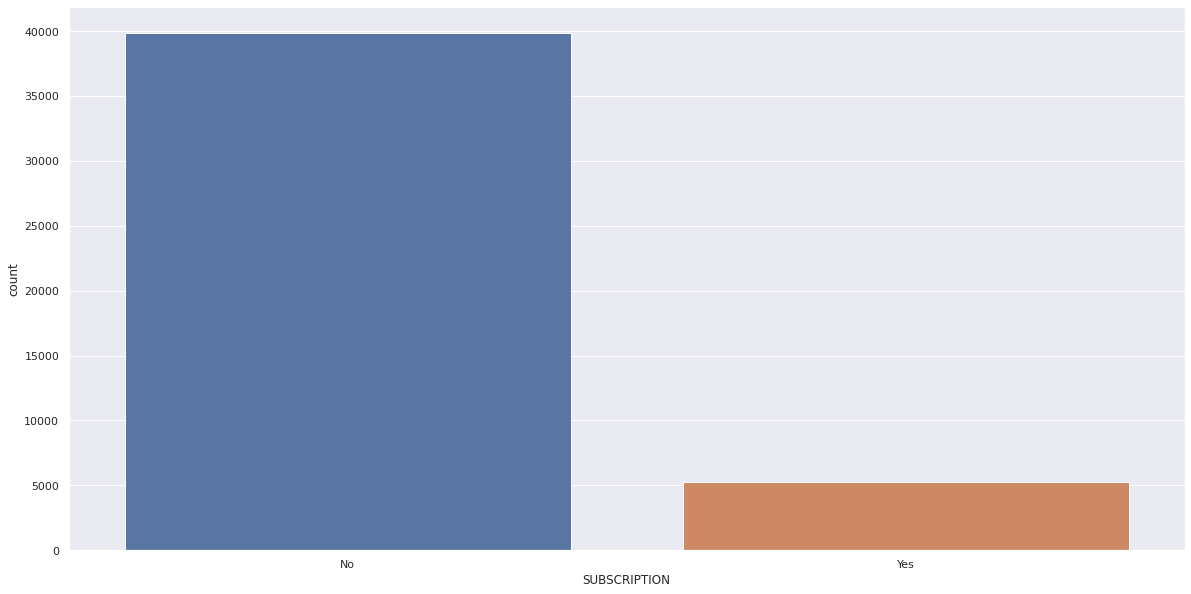

In [142]:
sns.countplot(x=df_marketing['SUBSCRIPTION'])

# Analyse multivariée

<AxesSubplot:>

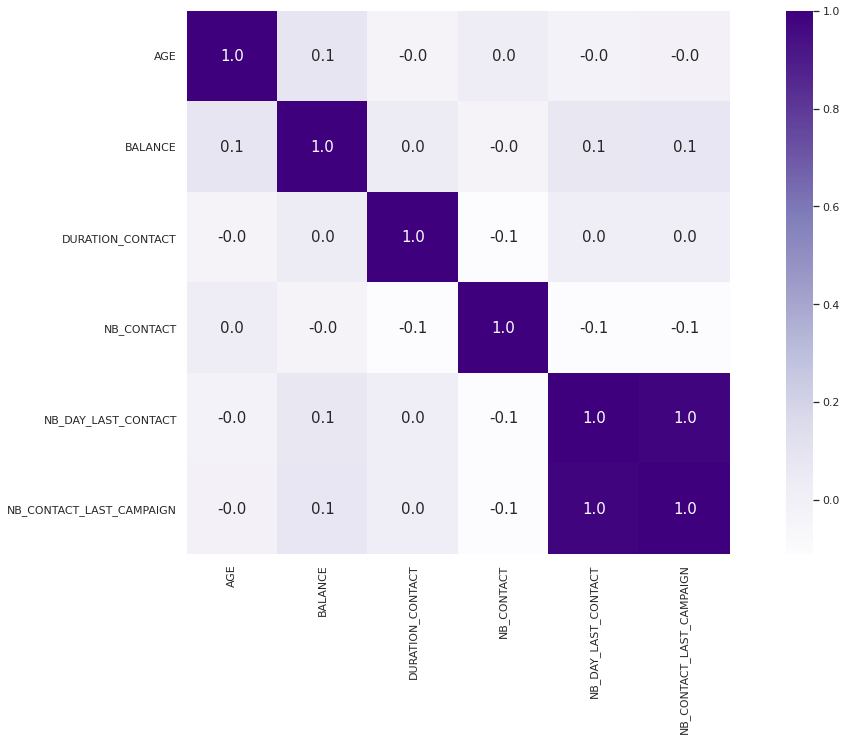

In [145]:
corr = df_marketing.corr('spearman')
sns.heatmap(corr, cbar=True, square= True,fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Purples')

Une seule corrélation observée entre 'NB_DAY_LAST_CONTACT' et 'NB_CONTACT_LAST_CAMPAIGN', très élévée en Spearman et Kendall.

### Continuous to Categorical

for:
- BALANCE
- DURATION_CONTACT
- NB_DAY_LAST_CONTACT

In [154]:
df_marketing.loc[(df_marketing['BALANCE'] <= 0), 'BALANCE_CAT']  = 'low_balance'
df_marketing.loc[(df_marketing['BALANCE'] > 0) & (df_marketing['BALANCE'] <= 2000), 'BALANCE_CAT'] = 'average_balance'
df_marketing.loc[(df_marketing['BALANCE'] > 2000) & (df_marketing['BALANCE'] <= 5000), 'BALANCE_CAT'] = 'high_balance'
df_marketing.loc[(df_marketing['BALANCE'] > 5000), 'BALANCE_CAT'] = 'very_high_balance'
df_marketing['BALANCE_CAT'] = df_marketing['BALANCE_CAT'].astype('category')

In [155]:
df_marketing.loc[(df_marketing['DURATION_CONTACT'] >= 0) & (df_marketing['DURATION_CONTACT'] <= 333), 'DURATION_CONTACT_CAT'] = 'short_contact'
df_marketing.loc[(df_marketing['DURATION_CONTACT'] > 333 ) & (df_marketing['DURATION_CONTACT'] <= 666), 'DURATION_CONTACT_CAT'] = 'medium_contact'
df_marketing.loc[(df_marketing['DURATION_CONTACT'] > 666) & (df_marketing['DURATION_CONTACT'] <= 1000), 'DURATION_CONTACT_CAT'] = 'long_contact'
df_marketing.loc[(df_marketing['DURATION_CONTACT'] > 1000), 'DURATION_CONTACT_CAT'] = 'very_long_contact'
df_marketing['DURATION_CONTACT_CAT'] = df_marketing['DURATION_CONTACT_CAT'].astype('category')

In [156]:
df_marketing.loc[(df_marketing['NB_DAY_LAST_CONTACT'] == -1), 'NB_DAY_LAST_CONTACT_CAT'] = 'is_first_campaign'
df_marketing.loc[(df_marketing['NB_DAY_LAST_CONTACT'] >= 0 ) & (df_marketing['NB_DAY_LAST_CONTACT'] <= 200), 'NB_DAY_LAST_CONTACT_CAT'] = 'nb_day_last_contact_inf_200'
df_marketing.loc[(df_marketing['NB_DAY_LAST_CONTACT'] > 200) & (df_marketing['NB_DAY_LAST_CONTACT'] <= 400), 'NB_DAY_LAST_CONTACT_CAT'] = 'nb_day_last_contact_inf_400'
df_marketing.loc[(df_marketing['NB_DAY_LAST_CONTACT'] > 400), 'NB_DAY_LAST_CONTACT_CAT'] = 'nb_day_last_contact_sup_400'
df_marketing['NB_DAY_LAST_CONTACT_CAT'] = df_marketing['NB_DAY_LAST_CONTACT_CAT'].astype('category')


In [159]:
df_marketing.loc[(df_marketing['NB_CONTACT'] < 3), 'NB_CONTACT_CAT'] = '< 3'
df_marketing.loc[(df_marketing['NB_CONTACT'] >= 3 ) & (df_marketing['NB_CONTACT'] <= 6), 'NB_CONTACT_CAT'] = '3-6'
df_marketing.loc[(df_marketing['NB_CONTACT'] > 6) & (df_marketing['NB_CONTACT'] <= 10), 'NB_CONTACT_CAT'] = '6-10'
df_marketing.loc[(df_marketing['NB_CONTACT'] > 10), 'NB_CONTACT_CAT'] = '> 10'
df_marketing['NB_CONTACT_CAT'] = df_marketing['NB_CONTACT_CAT'].astype('category')

<AxesSubplot:xlabel='BALANCE_CAT', ylabel='count'>

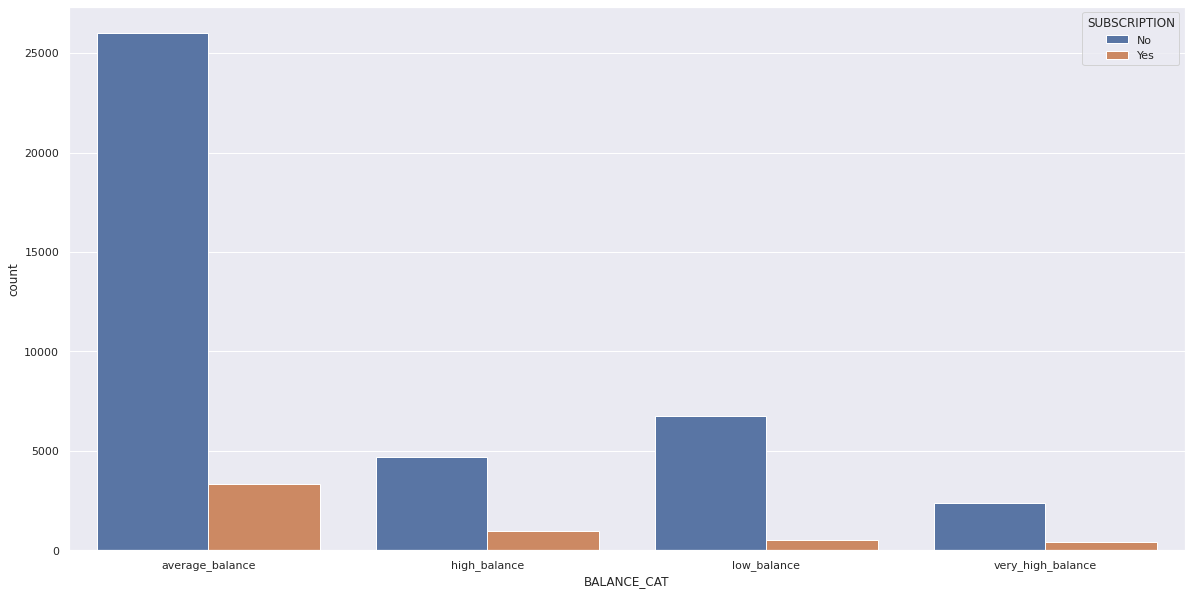

In [149]:
sns.countplot(x=df_marketing['BALANCE_CAT'], hue=df_marketing['SUBSCRIPTION'])

In [173]:
rcParams['figure.figsize'] = 20,10

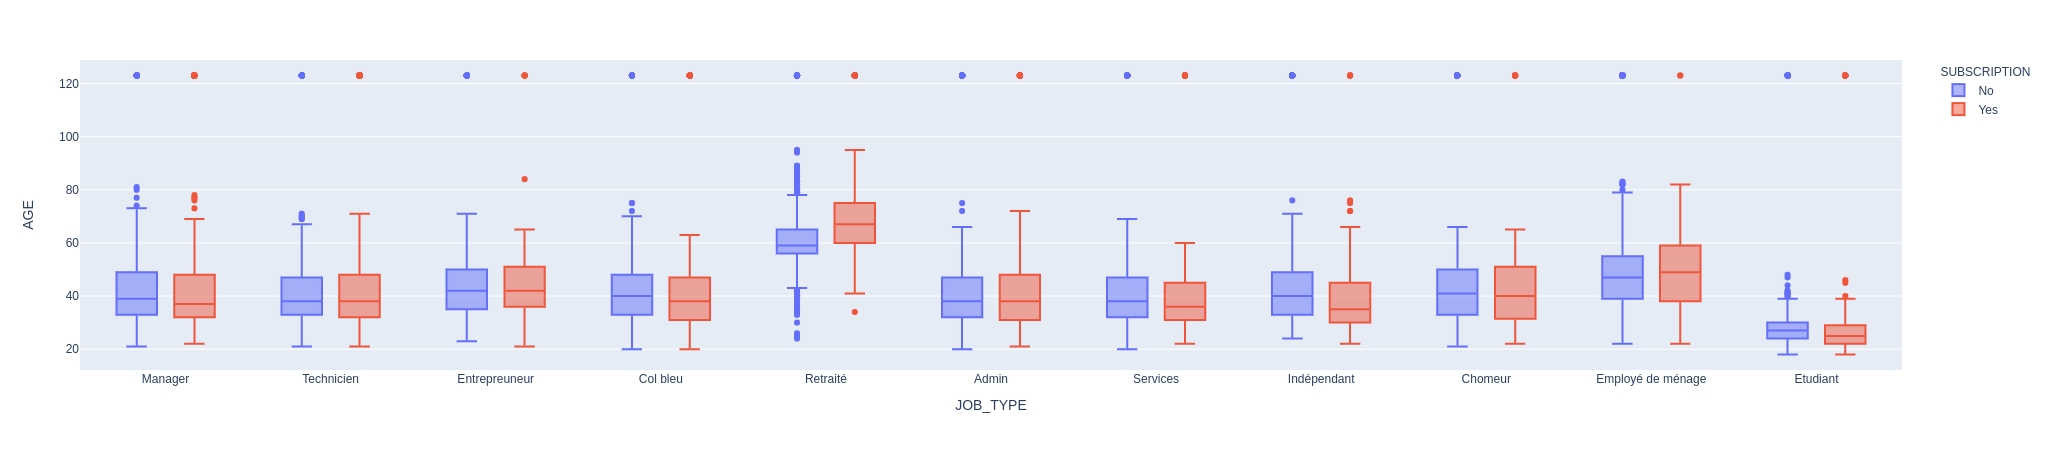

In [174]:

fig = px.box(df_marketing, x="JOB_TYPE", y="AGE", color="SUBSCRIPTION")
fig.update_traces(quartilemethod="exclusive") 
fig.show()

<AxesSubplot:xlabel='DURATION_CONTACT_CAT', ylabel='count'>

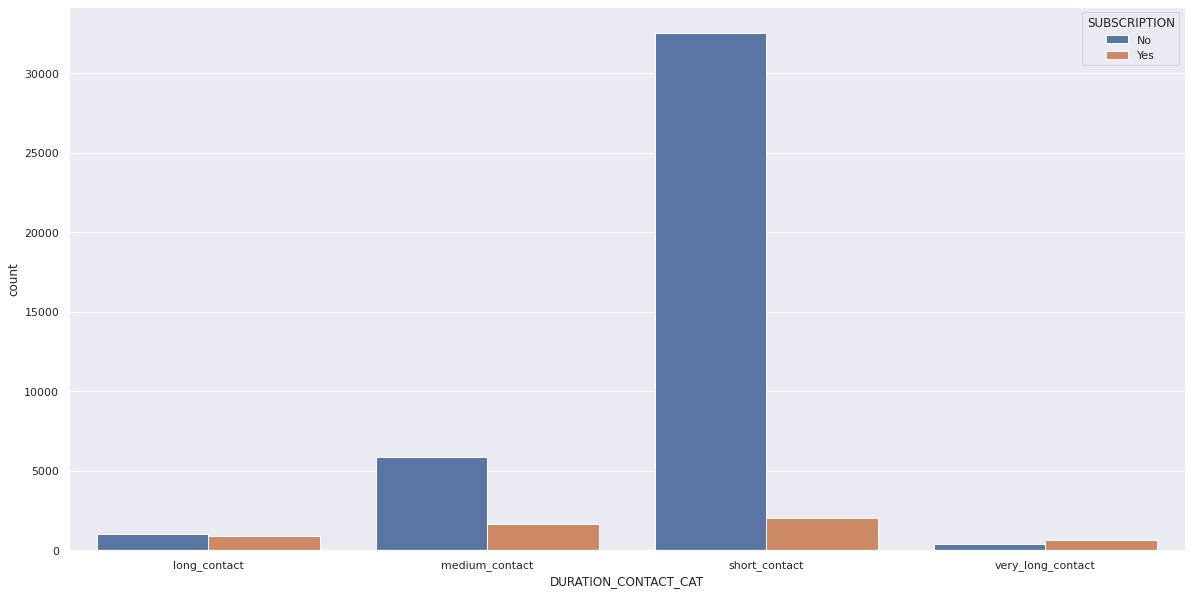

In [175]:
sns.countplot(x=df_marketing['DURATION_CONTACT_CAT'], hue=df_marketing['SUBSCRIPTION'])

<AxesSubplot:xlabel='NB_DAY_LAST_CONTACT_CAT', ylabel='count'>

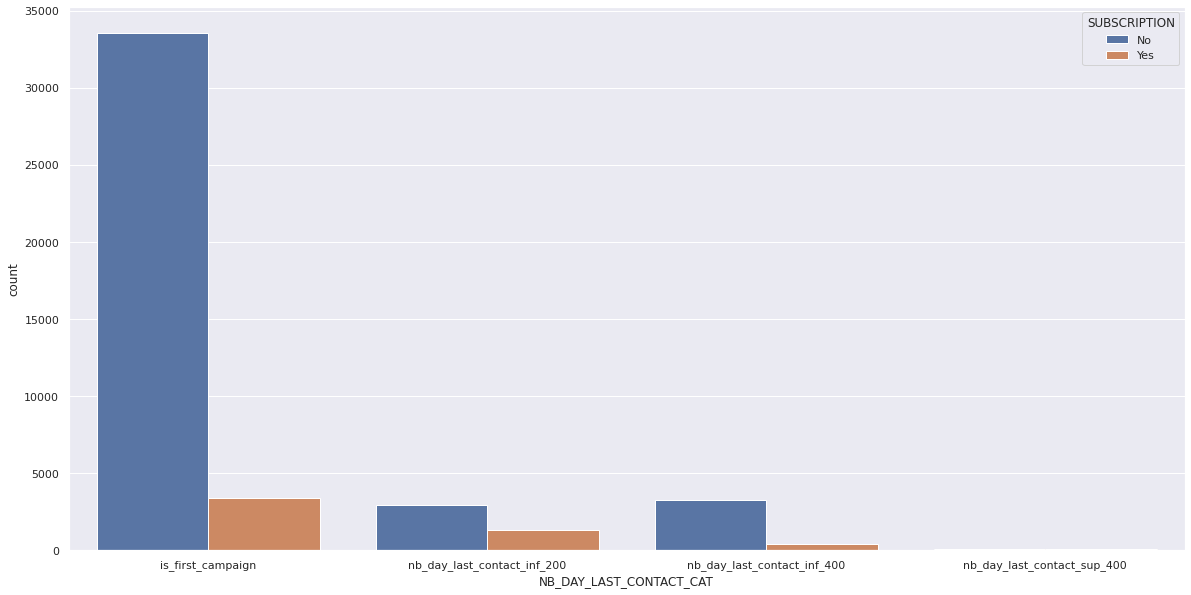

In [176]:
sns.countplot(x=df_marketing['NB_DAY_LAST_CONTACT_CAT'], hue=df_marketing['SUBSCRIPTION'])

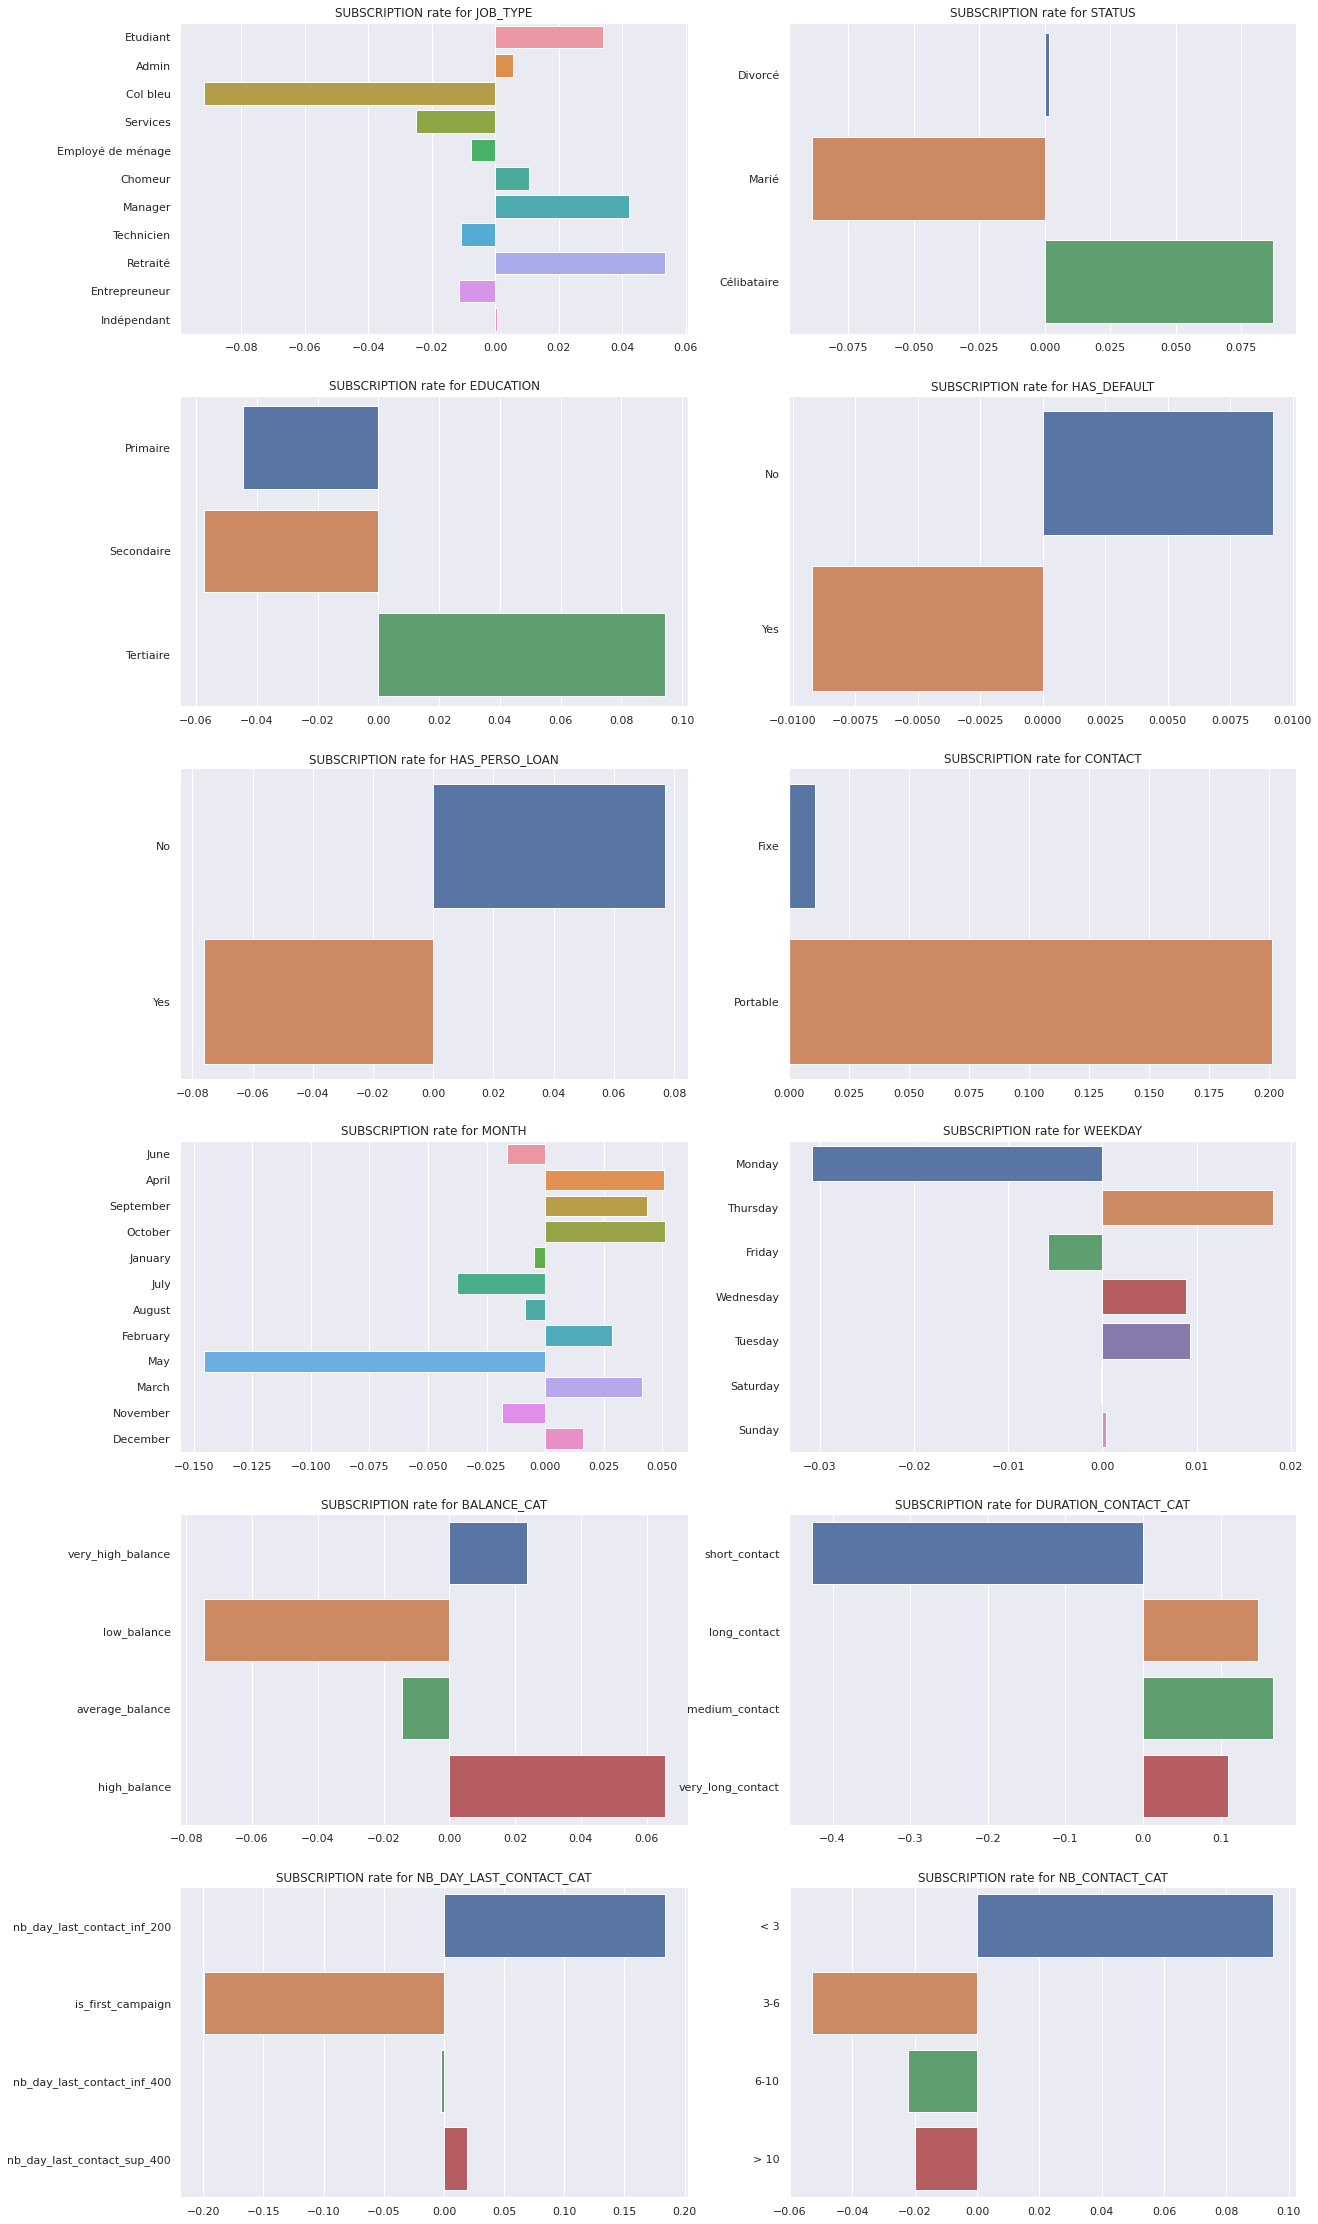

In [177]:
fig, axes =plt.subplots(6,2, figsize=(20,40))
axes = axes.flatten()

object_bol = df_marketing.dtypes == 'category'
for ax, col in zip(axes, df_marketing.dtypes[object_bol].index):
    pos_counts = df_marketing.loc[df_marketing['SUBSCRIPTION'].values == 'Yes', col].value_counts() 
    neg_counts = df_marketing.loc[df_marketing['SUBSCRIPTION'].values == 'No', col].value_counts()
    
    all_counts = list(set(list(pos_counts.index) + list(neg_counts.index)))
    freq_pos = (df_marketing['SUBSCRIPTION'].values == 'Yes').sum()
    freq_neg = (df_marketing['SUBSCRIPTION'].values == 'No').sum()
    
    pos_counts = pos_counts.to_dict()
    neg_counts = neg_counts.to_dict()
    
    all_index = list(all_counts)
    all_counts = [pos_counts.get(k, 0) / freq_pos - neg_counts.get(k, 0) / freq_neg for k in all_counts]
    
    sns.barplot(x = all_counts, y=all_index, ax=ax)
    ax.set_title(f"SUBSCRIPTION rate for {col}")

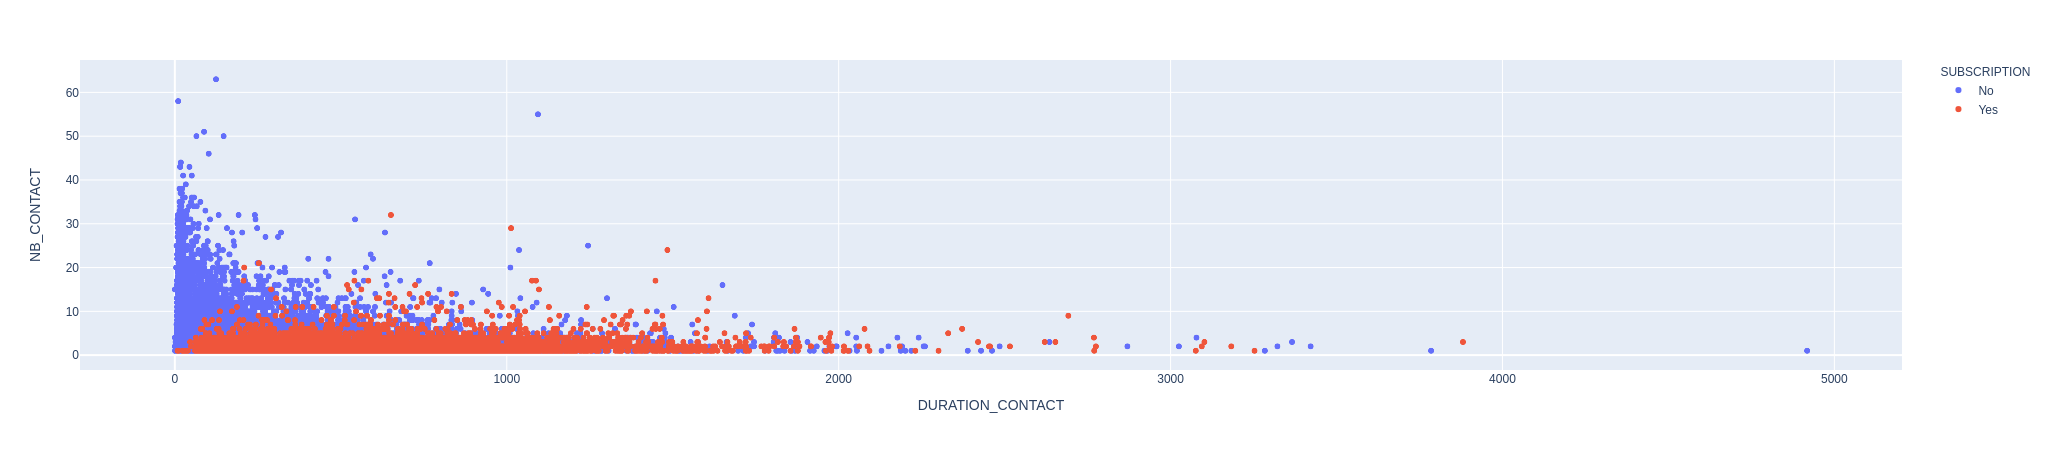

In [163]:
fig = px.scatter(df_marketing, x="DURATION_CONTACT", y="NB_CONTACT", color="SUBSCRIPTION")
fig.show()

<AxesSubplot:xlabel='JOB_TYPE', ylabel='count'>

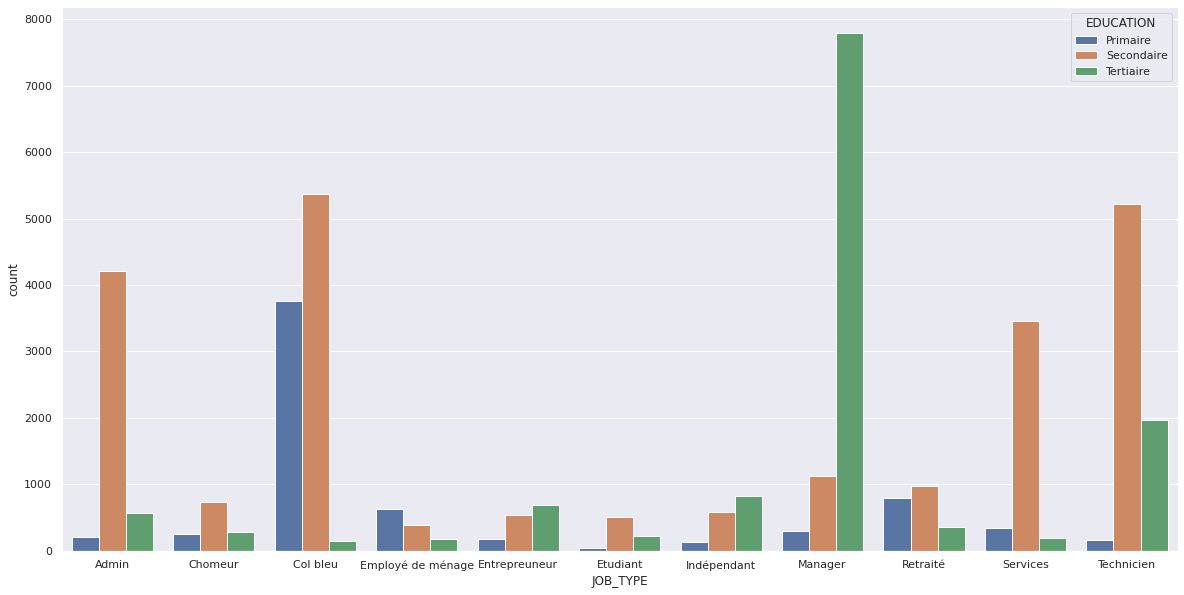

In [179]:
sns.countplot(x=df_marketing['JOB_TYPE'], hue=df_marketing['EDUCATION'])

## REPORT

- We saw that some features are heavily correlated ( from economical dataset ), we can ask ourself how to deal with them?
- DURATION_CONTACT, BALANCE, JOB_TYPE, IS_FIRST_CAMPAIGN, NB_CONTACT, MONTH should have importance for the future model

About the **Nan Values** , we can try to fill them with differents values from other features ( for example, if the **EDUCATION** of *'Manager' is missing we can try to fill it with 'Tertiaire'